>>> ### Graph theory in communication and networks - Spring'16 project

> > # Dynamic Communities in Evolving Network Graphs

                              ### Joseph P. Macker, David J. Claypool

In [1]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh
%matplotlib inline
import random

In [2]:
from Pycluster import *

In [57]:
def sct(G,x1,kp,cidp,pos={}):
    
    L=nx.normalized_laplacian_matrix(G).todense() #normalized laplacian
    
    el,U= eigh(L) #spectral decomposition
    
    #Eigengap heuristic - K value decision
    
    l=len(el)
    eld=[]
    for i in range(l-1):
        eld += [el[i+1]-el[i]] #Eigengap values

    for j in range(len(eld)):
        if (eld[j]==max(eld)):
            elm = eld[j] #Max eigenvale
            k=j+1    #k - number of clusters
    
    ela = np.mean(eld) #Average value of eigengap values
    
    pq = elm/ela #Effectiveness of partitioning
    
    #print('K = ',k,' Clustering quality = ',pq)
    
    U1=U[:,1:k] #K eigenvectors
    
    if (k==kp):
        clusterid, error, nfound = kcluster (U1, nclusters=k, initialid=cidp)
    else:
        clusterid, error, nfound = kcluster (U1, nclusters=k, initialid=None)
    
    #clusterid, error, nfound = kcluster (U1, nclusters=k, initialid=None)
    #print(clusterid,error,nfound)
    
    x=x1
    #node_color=clusterid,
    
    if(x==1):  
        if pos:
            plt.figure()
            nx.draw_networkx_nodes(G,pos=pos,alpha=0.5,with_labels=True)
            fig=plt.gcf()
            fig.set_size_inches(5,5)

        else: 
            nx.draw(G,node_color=colors,alpha=0.5)
    
    
    return k,pq,clusterid

In [80]:
def graphpos(m,nn,cen):
    pos={}
    
    if (cen == 5):
        means=[[0,0],[5,7],[8,2],[4,-1],[0,6]]
    elif (cen == 6):
        means=[[0,0],[5,7],[8,2],[4,-1],[0,6],[3,3]]
    
    #m=random.randint(1,n)
    #m=n*random.random()
    
    for node in range(nn):
        cluster=random.randint(0,len(means)-1) #inclusive of two points
        nodemean=means[cluster]
        nodepos=tuple([coord+(m)*random.random() for coord in nodemean])
        pos[node]=nodepos

    G=nx.Graph()
    
    for u in range(len(pos)):
        for v in range(u,len(pos)):
            G.add_edge(u,v,weight=np.exp(-(pos[u][0]-pos[v][0])**2
                                        -(pos[u][1]-pos[v][1])**2))
    
    return G,pos

In [81]:
def scd(a,draw):
    pql=[]
    kl=[]
    m=[]
    n=5
    
    m1=np.linspace(n,0.1,a)
    m2=np.linspace(0.1,n,a)
    
    for i in range(len(m1)):
        m += [m1[i]]

    for i in range(1,len(m2)):
        m += [m2[i]]
    
    k1=0
    cid1=[]
    
    for i in range(len(m)):
        kp=k1
        cidp=cid1
        G,pos = graphpos(m[i],100,6)
        k1,pq1,cid1 = sct(G,draw,kp,cidp,pos)

        pql +=[pq1]
        kl += [k1]
        #time.sleep(0.3)
    
    #Plotting options
    plt.figure()
    p1, = plt.plot(pql,'*-b')
    p1.set_label('Clustering quality')
    plt.hold(True)
    p2, = plt.plot(kl,'.-g')
    p2.set_label('# of clusters')
    p3, = plt.plot(m,'o-r')
    p3.set_label('Spread factor')
    plt.legend()
    fig=plt.gcf()
    fig.set_size_inches(8,6)
    

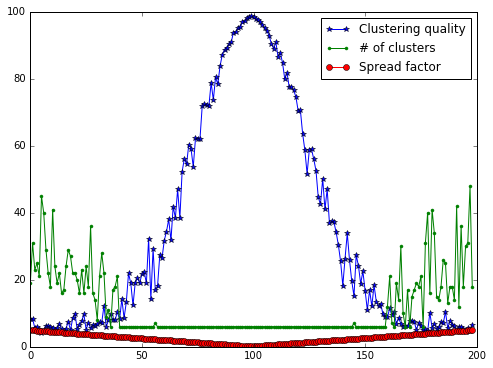

In [83]:
scd(100,0)